In [142]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).parent)) # add parent directory to path to import python files from there

import grainsizing
import gsd_uncertainty
import plotting
import data_loader

import warnings
warnings.filterwarnings("ignore")

## Load the scaled results

In [2]:
PATH = 'F:/demo/'
#find results in folder for 'fh_pred'
fh_pred_gsds = data_loader.load_grain_set(PATH,gsd_str='fh_pred_grains_re_scaled')
#find results in folder for label masks
gt_mask_gsds = data_loader.load_grain_set(PATH,gsd_str='mask_grains_re_scaled')

## Calculate the grain size disdtributions (GSD)

In [3]:
#specify column name for axis
column_name='ell: b-axis (mm)'
#load results and get gsd for each image for a specific axis column
fh_gsd_l,fh_id_l = grainsizing.gsd_for_set(fh_pred_gsds,column=column_name)
#do the same for label masks
gt_gsd_l,gt_id_l = grainsizing.gsd_for_set(gt_mask_gsds,column=column_name)

### Plot the GSDs

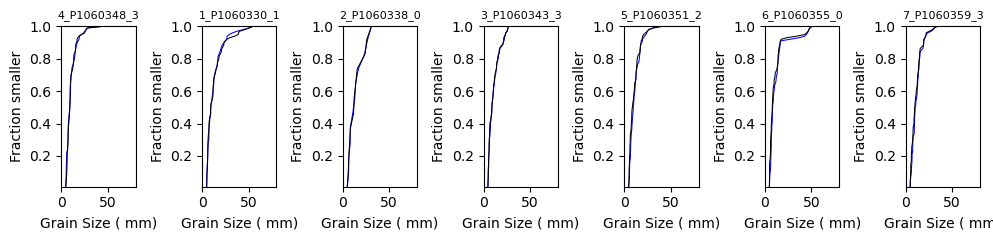

In [4]:
plt.figure(figsize=(10,2.5))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    plotting.plot_gsd(fh_gsd_l[i],color='b',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_pred')[0])

## Calculate percentile uncertainties

In [5]:
#number of iterations for randomization
num_it  = 1000

In [36]:
# Percentile uncertainty with bootstrapping (counting statistics only)
res_dict_bs = gsd_uncertainty.dataset_uncertainty(gsds=fh_pred_gsds,num_it=num_it,mute=True,column_name=column_name,return_results=True,sep=';',gsd_id = fh_id_l)
# Percentile uncertainty with Monte Carlo (counting statistics & scale, length uncertainty)
res_dict_MC = gsd_uncertainty.dataset_uncertainty(fh_pred_gsds,num_it=num_it,mute=True,column_name=column_name,method='MC',return_results=True,sep=';',gsd_id = fh_id_l)

MC: 100%|██████████| 7/7 [00:25<00:00,  3.65s/gsd]


In [37]:
# Estimate uncertainty for ground truth 
res_dict_gt_bs = gsd_uncertainty.dataset_uncertainty(gsds=gt_mask_gsds,num_it=num_it,mute=True,column_name=column_name,return_results=True,sep=';',gsd_id = gt_id_l)
res_dict_gt_MC = gsd_uncertainty.dataset_uncertainty(gsds=gt_mask_gsds,num_it=num_it,mute=True,column_name=column_name,method='MC',return_results=True,sep=';',gsd_id = gt_id_l)

MC: 100%|██████████| 7/7 [00:24<00:00,  3.48s/gsd]


### Compare uncertainty methods

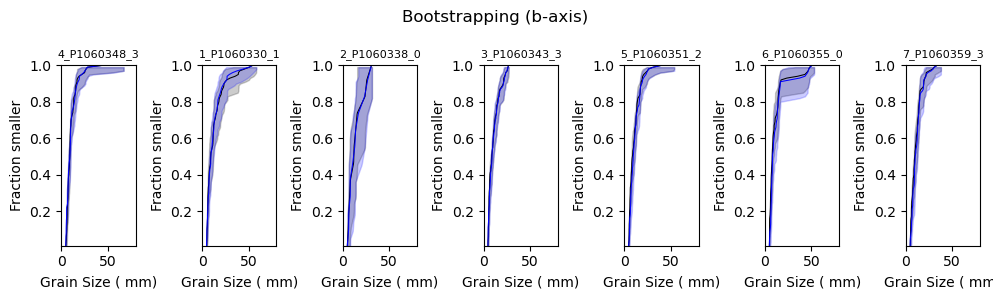

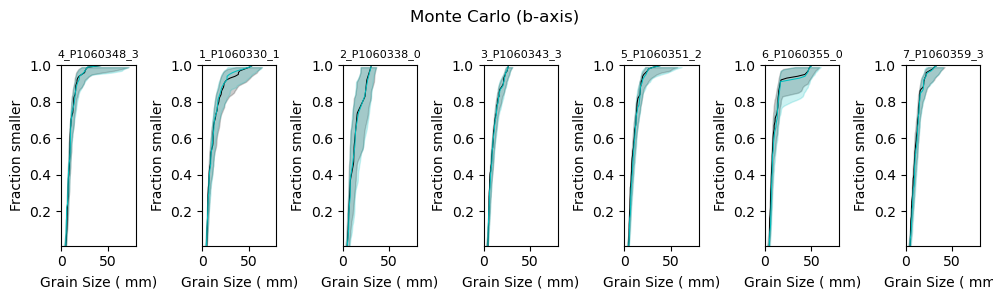

In [44]:
plt.figure(figsize=(10,3))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    #plot gt gsd for reference
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_pred')[0])
    #plot gt uncertainty for reference
    plotting.plot_gsd_uncert(res_dict_gt_bs[gt_id_l[i]],color='k')
    #plot gsd
    plotting.plot_gsd(fh_gsd_l[i],color='b',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    #plot uncertainty
    plotting.plot_gsd_uncert(res_dict_bs[fh_id_l[i]],color='b')
    plt.suptitle('Bootstrapping (b-axis)')

plt.figure(figsize=(10,3))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    #plot gt gsd for reference
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_pred')[0])
    #plot gt uncertainty for reference
    plotting.plot_gsd_uncert(res_dict_gt_MC[gt_id_l[i]],color='k')
    #plot gsd
    plotting.plot_gsd(fh_gsd_l[i],color='c',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    #plot uncertainty
    plotting.plot_gsd_uncert(res_dict_MC[fh_id_l[i]],color='c')
    plt.suptitle('Monte Carlo (b-axis)')

## Calculate grain size statistics for each image

In [ ]:
summary_df = grainsizing.summary_statistics(fh_pred_gsds,res_dict_bs,fh_id_l,data_id='fh_demo')
summary_df.head()